In [68]:
import requests
import time
import seaborn as sns

import pandas as pd

import numpy as np
import xgboost
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_text, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [69]:
df_2019 = pd.read_csv('../Data/2019_data.csv')

In [71]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      384 non-null    int64  
 1   msa             384 non-null    int64  
 2   NAME            384 non-null    object 
 3   S1701_C01_001E  384 non-null    int64  
 4   S2201_C01_001E  384 non-null    int64  
 5   S0101_C01_024E  384 non-null    int64  
 6   S0101_C01_022E  384 non-null    int64  
 7   S0101_C01_028E  384 non-null    int64  
 8   S2301_C01_001E  384 non-null    int64  
 9   B01001_001E     384 non-null    int64  
 10  B25001_001E     384 non-null    int64  
 11  B25002_001E     384 non-null    int64  
 12  B25005_001E     384 non-null    float64
 13  B25048_001E     384 non-null    float64
 14  B25052_001E     384 non-null    float64
 15  B25007_012E     384 non-null    int64  
 16  B25041_003E     384 non-null    int64  
 17  B25041_004E     384 non-null    int

### Obtaining best correlations

In [4]:
heisman_corr = df_2019.corr()['gdp_2019']

In [5]:
# Change max number of rows (to 101, for example)
pd.set_option("display.max_rows", 100)

In [6]:
# Change max number of rows (to 101, for example)
pd.set_option("display.max_columns", 100)

In [8]:
# discover dummy correlations
test = heisman_corr.sort_values(ascending=False)
test[0:15]

gdp_2019          1.000000
B06009_005E       0.990436
B25007_012E       0.986863
B06009_006E       0.985376
B25041_003E       0.980057
S0101_C01_024E    0.978847
B01001_001E       0.978817
S2201_C01_001E    0.978787
S1701_C01_001E    0.978706
B25052_001E       0.978666
B25048_001E       0.978490
B25001_001E       0.975824
B25002_001E       0.975824
S0101_C01_028E    0.973796
S0101_C01_022E    0.967721
Name: gdp_2019, dtype: float64

### Corr heatmap

In [9]:
df_2019.columns

Index(['Unnamed: 0', 'msa', 'NAME', 'S1701_C01_001E', 'S2201_C01_001E',
       'S0101_C01_024E', 'S0101_C01_022E', 'S0101_C01_028E', 'S2301_C01_001E',
       'B01001_001E', 'B25001_001E', 'B25002_001E', 'B25005_001E',
       'B25048_001E', 'B25052_001E', 'B25007_012E', 'B25041_003E',
       'B25041_004E', 'B25041_005E', 'B25041_006E', 'B25041_007E',
       'B25019_001E', 'B06011_001E', 'B06009_002E', 'B06009_003E',
       'B06009_004E', 'B06009_005E', 'B06009_006E', 'gdp_2019'],
      dtype='object')

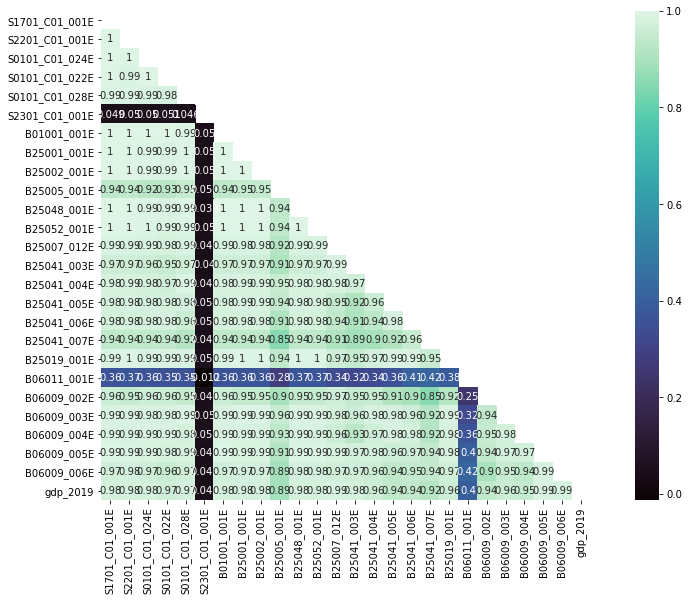

In [11]:
# This code is taken with minor modifications from https://seaborn.pydata.org/generated/seaborn.heatmap.html
corr_df = df_2019[['S1701_C01_001E', 'S2201_C01_001E',
       'S0101_C01_024E', 'S0101_C01_022E', 'S0101_C01_028E', 'S2301_C01_001E',
       'B01001_001E', 'B25001_001E', 'B25002_001E', 'B25005_001E',
       'B25048_001E', 'B25052_001E', 'B25007_012E', 'B25041_003E',
       'B25041_004E', 'B25041_005E', 'B25041_006E', 'B25041_007E',
       'B25019_001E', 'B06011_001E', 'B06009_002E', 'B06009_003E',
       'B06009_004E', 'B06009_005E', 'B06009_006E', 'gdp_2019']]
# Establish size of figure.
plt.figure(figsize = (16,9))

# Get correlation of variables.
corr = corr_df.corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
sns.heatmap(corr, mask = mask, square = True, cmap = 'mako', annot = True);

### tot(votes) vs. total_td

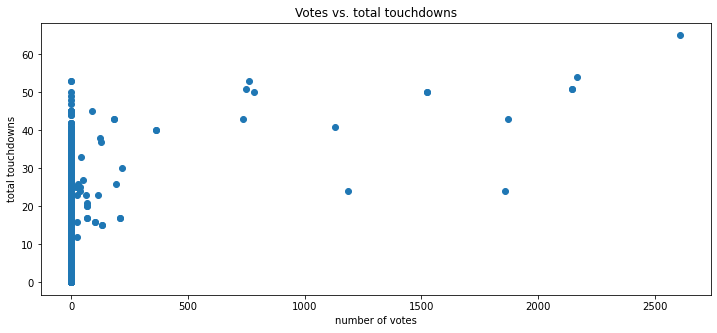

In [20]:
# Size
plt.figure(figsize = (12, 5))

plt.scatter(df['tot'],
            df['total_td'])

# Create a descriptive title
plt.title('Votes vs. total touchdowns')
# Add axis labels
plt.xlabel('number of votes')
plt.ylabel('total touchdowns');

In [30]:
df['tot']

player
Mac Jones              1130.0
Kaleb Eleby               0.0
Zach Wilson              42.0
Layne Hatcher             0.0
Dustin Crum               0.0
                        ...  
OJ Clark                  0.0
D'Eriq King               0.0
Ryan Davis                0.0
Isaiah Johnson-Mack       0.0
Darian Green              0.0
Name: tot, Length: 4539, dtype: float64

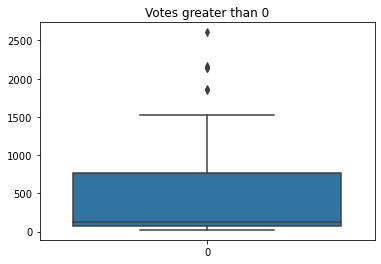

In [41]:
# box and whisker plot of a numerical variable
from pandas import read_csv
from seaborn import boxplot
from matplotlib import pyplot
# load the dataset
non_zero = df['tot'] > 0
new_df = df[non_zero]
dataset = new_df['tot']

pyplot.title('Votes greater than 0');

# create box and whisker plot
boxplot(data=dataset)
# show plot
pyplot.show()


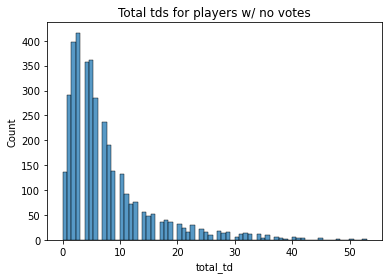

In [72]:
# bar chart plot of a categorical variable
from pandas import read_csv
from seaborn import histplot
from matplotlib import pyplot

pyplot.title('Total tds for players w/ no votes');

# load the dataset
non_zero = df['tot'] == 0 
new_df = df[non_zero]
dataset = new_df['total_td']
# create histogram plot
histplot(dataset)
# show plot
pyplot.show()

In [65]:
len(dataset)

3740

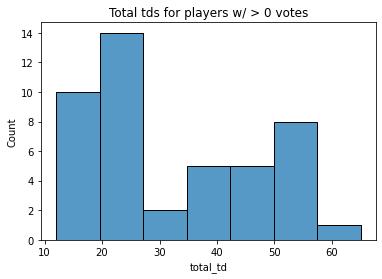

In [92]:
# bar chart plot of a categorical variable
from pandas import read_csv
from seaborn import histplot
from matplotlib import pyplot

pyplot.title('Total tds for players w/ > 0 votes');

# load the dataset
non_zero = df['tot'] > 0 
new_df = df[non_zero]
dataset = new_df['total_td']
# create histogram plot
histplot(dataset)
# show plot
pyplot.show()

In [63]:
len(dataset)

45

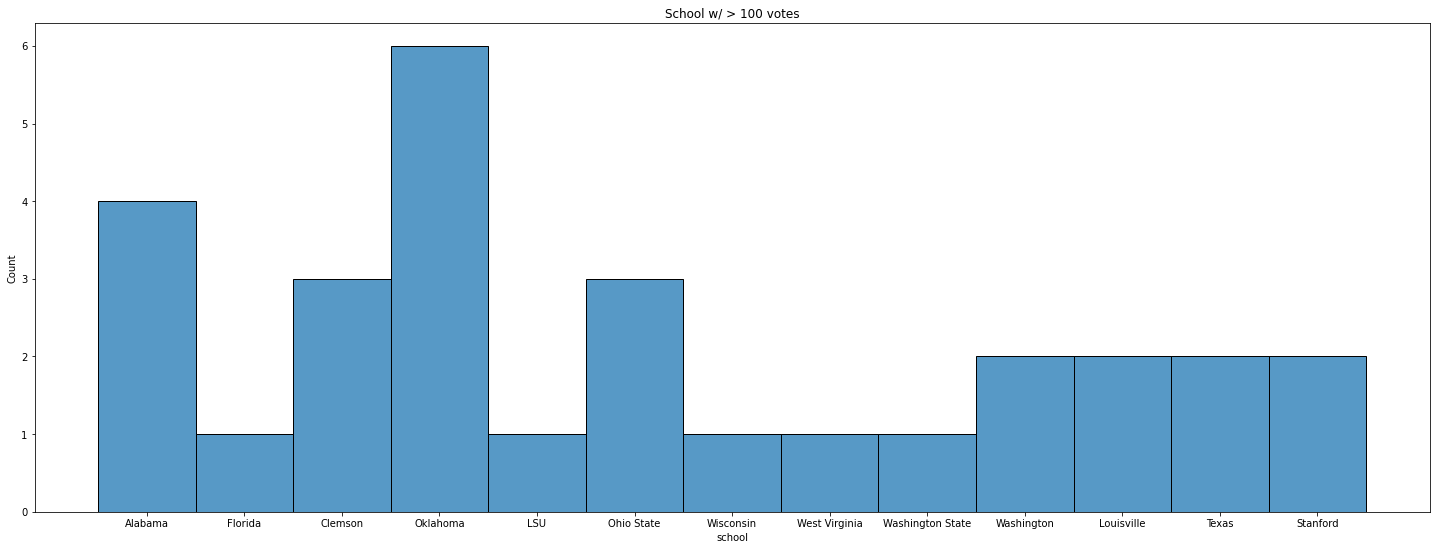

In [99]:
# bar chart plot of a categorical variable
from pandas import read_csv
from seaborn import histplot
from matplotlib import pyplot
plt.figure(figsize = (25,9))

pyplot.title('School w/ > 100 votes');

# load the dataset
non_zero = df['tot'] > 100 
new_df = df[non_zero]
dataset = new_df['school']
# create histogram plot
histplot(dataset)
# show plot
pyplot.show()

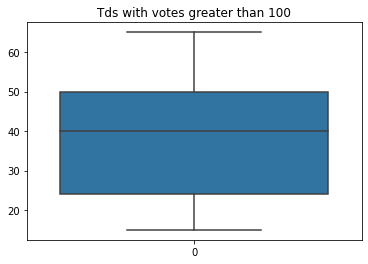

In [106]:
# box and whisker plot of a numerical variable
from pandas import read_csv
from seaborn import boxplot
from matplotlib import pyplot
# load the dataset
non_zero = df['tot'] > 100
new_df = df[non_zero]
dataset = new_df['total_td']

pyplot.title('Tds with votes greater than 100');

# create box and whisker plot
boxplot(data=dataset)
# show plot
pyplot.show()

In [112]:
df

player            school    conf_x     g  pass_cmp  \
0               Mac Jones           Alabama       SEC  13.0     311.0   
1             Kaleb Eleby  Western Michigan       MAC   6.0      98.0   
2             Zach Wilson     Brigham Young       Ind  12.0     247.0   
3           Layne Hatcher    Arkansas State  Sun Belt  11.0     116.0   
4             Dustin Crum        Kent State       MAC   4.0      83.0   
...                   ...               ...       ...   ...       ...   
4534             OJ Clark  New Mexico State  Sun Belt  11.0       0.0   
4535          D'Eriq King           Houston  American   9.0       0.0   
4536           Ryan Davis            Auburn       SEC  10.0       0.0   
4537  Isaiah Johnson-Mack  Washington State    Pac-12  11.0       0.0   
4538         Darian Green        Ball State       MAC   8.0       0.0   

      pass_att  pass_pct  pass_yds  pass_y/a  pass_ay/a  pass_td  pass_int  \
0        402.0      77.4    4500.0      11.2       12.8     41.0       4.0   
1        152.0      64.5    1699.0      11.2       13.0     18.0       2.0   
2        336.0      73.5    3692.0      11.0       12.6     33.0       3.0   
3        194.0      59.8    2058.0      10.6       12.1     19.0       2.0   
4        113.0      73.5    1181.0      10.5       11.8     12.0       2.0   
...        ...       ...       ...       ...        ...      ...       ...   
4534       0.0       0.0       0.0       0.0        0.0      0.0       0.0   
4535       0.0       0.0       0.0       0.0        0.0      0.0       0.0   
4536       0.0       0.0       0.0       0.0        0.0      0.0       0.0   
4537       0.0       0.0       0.0       0.0        0.0      0.0       0.0   
4538       0.0       0.0       0.0       0.0        0.0      0.0       0.0   

      pass_rate  rush_att  rush_yds  rush_avg  rush_td   rec  rec_yds  \
0         203.1      35.0      14.0       0.4      1.0   0.0      0.0   
1         194.8      34.0      38.0       1.1      4.0   0.0      0.0   
2         196.4      70.0     254.0       3.6     10.0   0.0      0.0   
3         179.2      43.0      15.0       0.3      0.0   0.0      0.0   
4         192.7      44.0     240.0       5.5      4.0   0.0      0.0   
...         ...       ...       ...       ...      ...   ...      ...   
4534        0.0       0.0       0.0       0.0      0.0  43.0    338.0   
4535        0.0      15.0      56.0       3.7      0.0  29.0    228.0   
4536        0.0       3.0       5.0       1.7      0.0  25.0    194.0   
4537        0.0       0.0       0.0       0.0      0.0  35.0    246.0   
4538        0.0      57.0     311.0       5.5      1.0  24.0    124.0   

      rec_avg  rec_td  touches  scrim_yds  scrim_avg  scrim_td  ovr_win  \
0         0.0     0.0      0.0        0.0        0.0       0.0     13.0   
1         0.0     0.0      0.0        0.0        0.0       0.0      4.0   
2         0.0     0.0      0.0        0.0        0.0       0.0      0.0   
3         0.0     0.0      0.0        0.0        0.0       0.0      4.0   
4         0.0     0.0     44.0      240.0        5.5       4.0      3.0   
...       ...     ...      ...        ...        ...       ...      ...   
4534      7.9     1.0     43.0      338.0        7.9       1.0      3.0   
4535      7.9     1.0     44.0      284.0        6.5       1.0      9.0   
4536      7.8     1.0     28.0      199.0        7.1       1.0      8.0   
4537      7.0     1.0     35.0      246.0        7.0       1.0      8.0   
4538      5.2     0.0     81.0      435.0        5.4       1.0      4.0   

      ovr_loss  ovr_pct  conf_win  conf_loss  conf_pct  off_ppg  def_ppg  \
0          0.0    1.000      11.0        0.0     1.000     48.5     19.4   
1          2.0    0.667       4.0        2.0     0.667     41.7     34.2   
2          0.0    0.000       0.0        0.0     0.000      0.0      0.0   
3          7.0    0.364       2.0        6.0     0.250     32.9     37.2   
4          1.0    0.750       3.0        1.0   

In [49]:
sorted(df['pop'], reverse=True)

[82400996,
 71158647,
 61083916,
 60776238,
 58147733,
 40448191,
 38518241,
 22276056,
 16570613,
 10706290,
 10642836,
 10392226,
 10228744,
 10150265,
 9956108,
 9031088,
 8199783,
 7554661,
 7322858,
 5468120,
 5447502,
 5238460,
 4627926,
 4552198,
 4493312,
 4109086,
 3600523,
 2009245,
 684736,
 301931]

In [37]:
df = px.data.gapminder().query("year == 2007").query("continent == 'Europe'")
df.head(5)

country continent  year  lifeExp       pop     gdpPercap  \
23                  Albania    Europe  2007   76.423   3600523   5937.029526   
83                  Austria    Europe  2007   79.829   8199783  36126.492700   
119                 Belgium    Europe  2007   79.441  10392226  33692.605080   
155  Bosnia and Herzegovina    Europe  2007   74.852   4552198   7446.298803   
191                Bulgaria    Europe  2007   73.005   7322858  10680.792820   

    iso_alpha  iso_num  
23        ALB        8  
83        AUT       40  
119       BEL       56  
155       BIH       70  
191       BGR      100

In [74]:
df_2019.head(3)

Unnamed: 0    msa                    NAME  S1701_C01_001E  S2201_C01_001E  \
0           0  10180  Abilene, TX Metro Area          158400           61750   
1           2  10420    Akron, OH Metro Area          685097          285647   
2           3  10500   Albany, GA Metro Area          141957           54128   

   S0101_C01_024E  S0101_C01_022E  S0101_C01_028E  S2301_C01_001E  \
0           75856           41350           35659          134883   
1          269984          141888          178763          579116   
2           57570           34411           34601          116771   

   B01001_001E  B25001_001E  B25002_001E  B25005_001E  B25048_001E  \
0       171795        72052        72052      10302.0      61750.0   
1       703479       316217       316217      30570.0     285647.0   
2       147384        66066        66066      11938.0      54128.0   

   B25052_001E  B25007_012E  B25041_003E  B25041_004E  B25041_005E  \
0      61750.0        24309         7823        18617        33259   
1     285647.0        96799        31557        80301       128543   
2      54128.0        25108         4366        18290        31727   

   B25041_006E  B25041_007E  B25019_001E  B06011_001E  B06009_002E  \
0         9779          994       392680      26622.0      10996.0   
1        60066        11383      1956297      30842.0      37410.0   
2         9588         1167       377460      24115.0      16748.0   

   B06009_003E  B06009_004E  B06009_005E  B06009_006E    gdp_2019  
0      35113.0      36815.0      17779.0       8521.0   6812477.0  
1     157491.0     138951.0      98114.0      57275.0  33086775.0  
2      28351.0      32968.0       9354.0       9765.0   5699287.0

In [48]:
sorted(df_2019['gdp_2019'], reverse=True)

[1573857186.0,
 960249652.0,
 618616499.0,
 531247412.0,
 492129890.0,
 472334266.0,
 472104254.0,
 423725910.0,
 401231953.0,
 382630156.0,
 371826639.0,
 327129154.0,
 320444051.0,
 242537142.0,
 237472532.0,
 237089292.0,
 222272562.0,
 202456263.0,
 188615454.0,
 171884061.0,
 156663199.0,
 152402085.0,
 150589392.0,
 148372290.0,
 145529947.0,
 143075741.0,
 133730544.0,
 132501716.0,
 128416036.0,
 126096448.0,
 123267766.0,
 121217044.0,
 118167899.0,
 117001202.0,
 115621292.0,
 110102880.0,
 93888193.0,
 93534792.0,
 89523156.0,
 88155402.0,
 84678690.0,
 79854813.0,
 79297922.0,
 79007652.0,
 78701911.0,
 77290815.0,
 75768093.0,
 68352723.0,
 64568844.0,
 63026922.0,
 61094332.0,
 57996493.0,
 56728386.0,
 56461199.0,
 55427936.0,
 55050649.0,
 54232223.0,
 53347706.0,
 51416782.0,
 48496595.0,
 48368218.0,
 47168892.0,
 46326963.0,
 46009312.0,
 45632930.0,
 45527976.0,
 42439987.0,
 42169490.0,
 41912704.0,
 40381782.0,
 40003761.0,
 39783704.0,
 39547761.0,
 39250733.0,
 

In [72]:
df_copy = df_2019.copy()

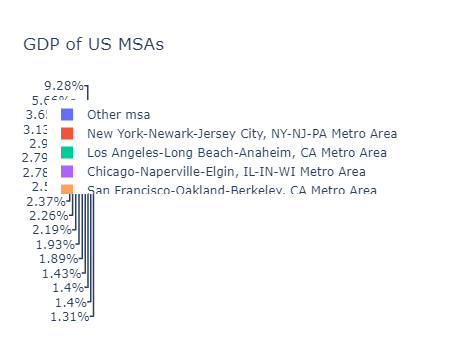

In [73]:
import plotly.express as px
df_new = df_copy
df_new.loc[df_new['gdp_2019'] < 222272560.0, 'NAME'] = 'Other msa' # Represent only large countries
fig = px.pie(df_new, values='gdp_2019', names='NAME', title='GDP of US MSAs', hole=0.3)
# fig.update_traces(textinfo='label+percent')
fig.show()

NameError: name 'pyplot' is not defined

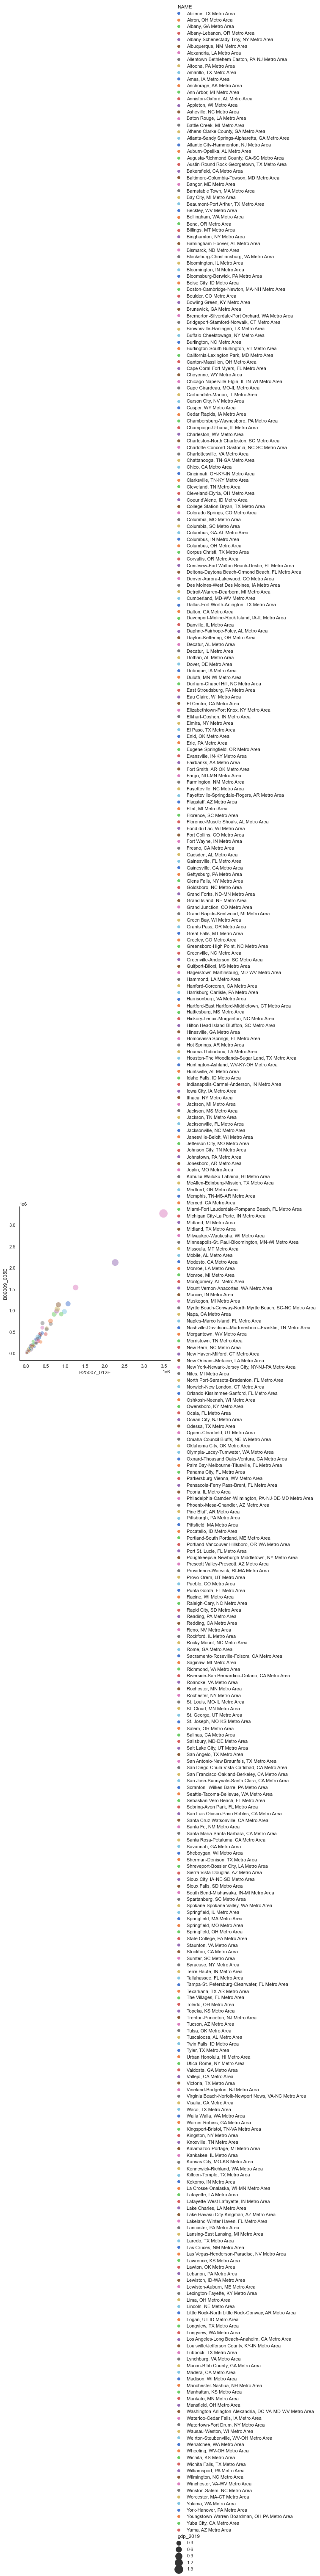

In [26]:
import seaborn as sns
# non_zero = df_2019['gdp_2019']
# new_df = df_2019[non_zero]

sns.set_theme(style="white")




# # Load the example mpg dataset
# df.rename({'tot': 'votes'}, axis=1, inplace=True)


# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="B25007_012E", y="B06009_005E", hue='NAME', size="gdp_2019",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df_2019)

pyplot.title('Votes > 10');

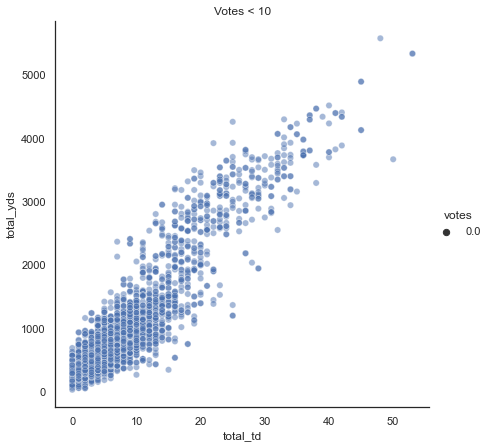

In [122]:
import seaborn as sns
non_zero = df['votes'] < 10
new_df = df[non_zero]

sns.set_theme(style="white")




# Load the example mpg dataset
df.rename({'tot': 'votes'}, axis=1, inplace=True)


# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="total_td", y="total_yds", size="votes",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=new_df)

pyplot.title('Votes < 10');

### Creating X and y

In [143]:
X = df_2019.drop(columns=['NAME','msa','gdp_2019','Unnamed: 0'])

In [144]:
y = df_2019['gdp_2019']

In [145]:
X.columns

Index(['S1701_C01_001E', 'S2201_C01_001E', 'S0101_C01_024E', 'S0101_C01_022E',
       'S0101_C01_028E', 'S2301_C01_001E', 'B01001_001E', 'B25001_001E',
       'B25002_001E', 'B25005_001E', 'B25048_001E', 'B25052_001E',
       'B25007_012E', 'B25041_003E', 'B25041_004E', 'B25041_005E',
       'B25041_006E', 'B25041_007E', 'B25019_001E', 'B06011_001E',
       'B06009_002E', 'B06009_003E', 'B06009_004E', 'B06009_005E',
       'B06009_006E'],
      dtype='object')

### Creating X and y test (gdp 2019 predict)

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.33,
                                                    random_state = 42)

In [147]:
# Get the shapes the training and testing subsets
print("X Shapes:")
print(f"Train: {X_train.shape}")
print(f"Test: {X_test.shape}")
print(" ")
print("y Shapes:")
print(f"Train: {y_train.shape}")
print(f"Test: {y_test.shape}")

X Shapes:
Train: (257, 25)
Test: (127, 25)
 
y Shapes:
Train: (257,)
Test: (127,)


### KNN 

In [148]:
pipe = Pipeline([
    ('knn', KNeighborsRegressor())
])

pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.7362323602408137, 0.7552225895842208)

### Decision Tree

In [149]:
pipe = Pipeline([
    ('Dec', DecisionTreeRegressor())
])

pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(1.0, 0.7904651560911217)

### Extra Tree

In [150]:
pipe = Pipeline([
    ('Ext', ExtraTreesRegressor())
])

pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(1.0, 0.9802902365532045)

### XG Boost

In [151]:
pipe = Pipeline([
    ('xgb', XGBRegressor())
])

pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.999999995052188, 0.7825658539920854)

### AdaBoost

In [152]:
pipe = Pipeline([
    ('adb', AdaBoostRegressor())
])

pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.9918783928072158, 0.8456639164433548)

In [21]:
pred = pipe.predict(X_test)

### Random Forest

In [153]:
pipe = Pipeline([
    ('rfr', RandomForestRegressor())
])

pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.928277743828827, 0.9165668380903117)

### Creating X and y (sdg score predict)

In [131]:
sdg_gdp_census_2019 = pd.read_csv('../Data/sdg_gdp_census_2019.csv')

In [132]:
X = sdg_gdp_census_2019.drop(columns=['msa','NAME','Unnamed: 0', 'Unnamed: 0.1', '_merge','score_sdgi'])

In [133]:
y = sdg_gdp_census_2019['score_sdgi']

In [134]:
sdg_gdp_census_2019.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'msa', 'NAME', 'S1701_C01_001E',
       'S2201_C01_001E', 'S0101_C01_024E', 'S0101_C01_022E', 'S0101_C01_028E',
       'S2301_C01_001E', 'B01001_001E', 'B25001_001E', 'B25002_001E',
       'B25005_001E', 'B25048_001E', 'B25052_001E', 'B25007_012E',
       'B25041_003E', 'B25041_004E', 'B25041_005E', 'B25041_006E',
       'B25041_007E', 'B25019_001E', 'B06011_001E', 'B06009_002E',
       'B06009_003E', 'B06009_004E', 'B06009_005E', 'B06009_006E', 'gdp_2019',
       'score_sdgi', '_merge'],
      dtype='object')

### Creating X and y test (sdg score pred)

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.33,
                                                    random_state = 42)

In [136]:
# Get the shapes the training and testing subsets
print("X Shapes:")
print(f"Train: {X_train.shape}")
print(f"Test: {X_test.shape}")
print(" ")
print("y Shapes:")
print(f"Train: {y_train.shape}")
print(f"Test: {y_test.shape}")

X Shapes:
Train: (69, 26)
Test: (35, 26)
 
y Shapes:
Train: (69,)
Test: (35,)


### KNN 

In [ ]:
pipe = Pipeline([
    ('knn', KNeighborsRegressor())
])

pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

### Decision Tree

In [138]:
pipe = Pipeline([
    ('Dec', DecisionTreeRegressor())
])

pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(1.0, 0.30758496141848624)

### Extra Tree

In [139]:
pipe = Pipeline([
    ('Ext', ExtraTreesRegressor())
])

pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(1.0, 0.4233191183713675)

### AdaBoost

In [140]:
pipe = Pipeline([
    ('adb', AdaBoostRegressor())
])

pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.888652573615534, 0.277045059226926)

In [30]:
pred = pipe.predict(X_test)

### XG Boost

In [142]:
pipe = Pipeline([
    ('xgb', XGBRegressor())
])

pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.999999990611609, 0.3877403812815722)

### Random Forest

In [141]:
pipe = Pipeline([
    ('rfr', RandomForestRegressor())
])

pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.9484936518798022, 0.3910079871942209)

In [32]:
pred = pipe.predict(X_test)

In [210]:
test = pd.DataFrame(pred)

In [211]:
test[0].value_counts(normalize=True)

0.00       0.956609
0.39       0.002003
11.58      0.001335
15.08      0.001335
11.87      0.001335
20.90      0.001335
270.10     0.001335
6.27       0.001335
6.75       0.000668
35.79      0.000668
6.29       0.000668
13.96      0.000668
110.85     0.000668
39.59      0.000668
55.18      0.000668
30.12      0.000668
112.86     0.000668
14.22      0.000668
33.44      0.000668
0.96       0.000668
62.35      0.000668
317.49     0.000668
25.08      0.000668
5.04       0.000668
52.20      0.000668
669.57     0.000668
11.34      0.000668
1094.97    0.000668
18.47      0.000668
87.20      0.000668
63.66      0.000668
50.19      0.000668
1.68       0.000668
10.58      0.000668
16.53      0.000668
1.28       0.000668
110.32     0.000668
2.50       0.000668
0.78       0.000668
233.80     0.000668
4.32       0.000668
45.17      0.000668
78.94      0.000668
69.06      0.000668
0.64       0.000668
5.27       0.000668
1002.52    0.000668
13.01      0.000668
6.24       0.000668
21.38      0.000668


### checking feature importance

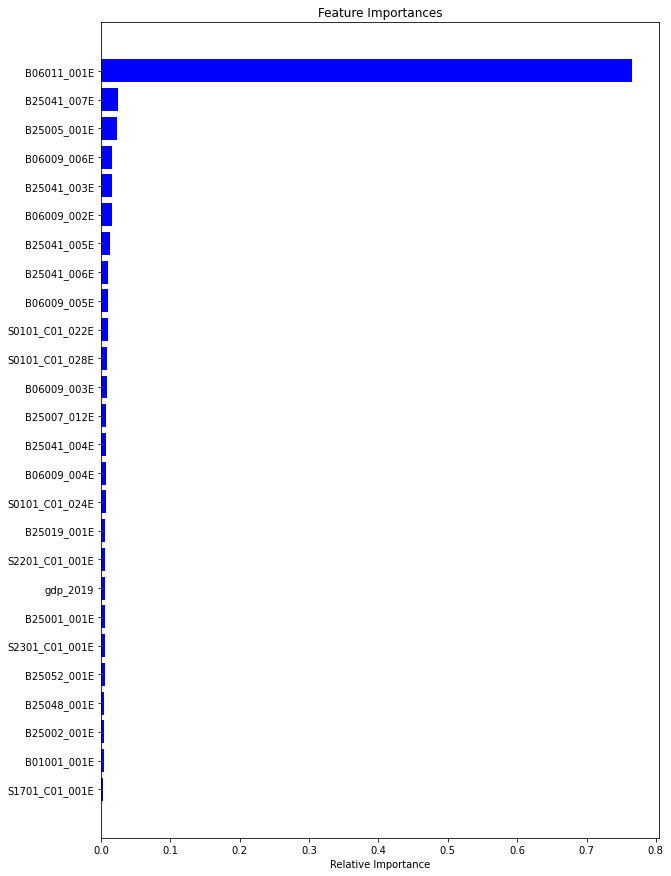

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Spliiting data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# fitting the model
model = RandomForestRegressor(n_estimators=100, n_jobs=1, random_state=0)
model.fit(X_train, y_train)

# plotting feature importances
features = X.columns
importances = model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [108]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9380835089640072, 0.39660540141191913)

In [55]:
X.columns

Index(['S1701_C01_001E', 'S2201_C01_001E', 'S0101_C01_024E', 'S0101_C01_022E',
       'S0101_C01_028E', 'S2301_C01_001E', 'B01001_001E', 'B25001_001E',
       'B25002_001E', 'B25005_001E', 'B25048_001E', 'B25052_001E',
       'B25007_012E', 'B25041_003E', 'B25041_004E', 'B25041_005E',
       'B25041_006E', 'B25041_007E', 'B25019_001E', 'B06011_001E',
       'B06009_002E', 'B06009_003E', 'B06009_004E', 'B06009_005E',
       'B06009_006E', 'gdp_2019'],
      dtype='object')

### Model with less features

In [117]:
X_improved = X[['B06011_001E','B25041_006E','B25005_001E','B06009_006E']]

In [118]:
X_improved

B06011_001E  B25041_006E  B25005_001E  B06009_006E
0        30842.0        60066      30570.0      57275.0
1        37442.0        76377      49814.0     108143.0
2        29861.0        66209      38716.0      93545.0
3        32273.0        67847      29229.0      62143.0
4        30721.0        59908      66852.0      51851.0
..           ...          ...          ...          ...
99       49957.0       558692     150481.0    1083660.0
100      31595.0        45626      28609.0      46077.0
101      29837.0        45142      33699.0      46023.0
102      35570.0        66100      24668.0      93873.0
103      26643.0        38229      28638.0      29988.0

[104 rows x 4 columns]

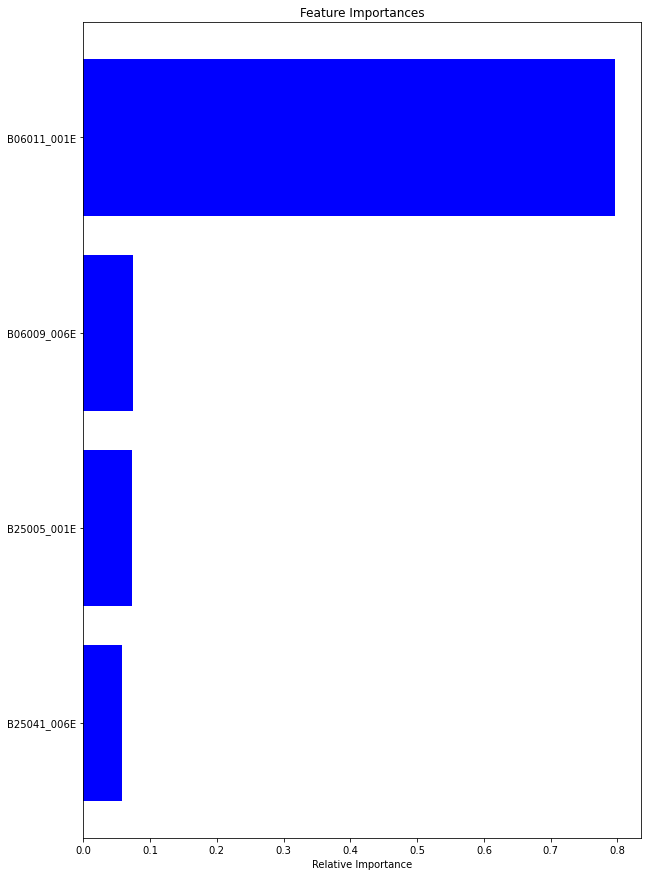

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Spliiting data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X_improved, y, test_size=0.33, random_state=42)
# fitting the model
model = RandomForestRegressor(n_estimators=100, n_jobs=1, random_state=0)
model.fit(X_train, y_train)

# plotting feature importances
features = X_improved.columns
importances = model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [120]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9438947085964535, 0.39895179773436207)

### Optimize best performing model (Random forest - gdp/census data)

### Creating X and y

In [122]:
X = df_2019.drop(columns=['NAME','msa','gdp_2019','Unnamed: 0'])

In [127]:
y = df_2019['gdp_2019']

In [17]:
X.columns

Index(['S1701_C01_001E', 'S2201_C01_001E', 'S0101_C01_024E', 'S0101_C01_022E',
       'S0101_C01_028E', 'S2301_C01_001E', 'B01001_001E', 'B25001_001E',
       'B25002_001E', 'B25005_001E', 'B25048_001E', 'B25052_001E',
       'B25007_012E', 'B25041_003E', 'B25041_004E', 'B25041_005E',
       'B25041_006E', 'B25041_007E', 'B25019_001E', 'B06011_001E',
       'B06009_002E', 'B06009_003E', 'B06009_004E', 'B06009_005E',
       'B06009_006E'],
      dtype='object')

### Creating X and y test (gdp 2019 predict)

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.33,
                                                    random_state = 42)

In [86]:
# Get the shapes the training and testing subsets
print("X Shapes:")
print(f"Train: {X_train.shape}")
print(f"Test: {X_test.shape}")
print(" ")
print("y Shapes:")
print(f"Train: {y_train.shape}")
print(f"Test: {y_test.shape}")

X Shapes:
Train: (288, 25)
Test: (96, 25)
 
y Shapes:
Train: (288,)
Test: (96,)


### Model instatiation

In [93]:
rf = RandomForestRegressor(n_estimators=100)

### Model evaluation

In [95]:
cross_val_score(rf, X_train, y_train, cv=5).mean()

0.7656614380318284

### Grid Search

In [96]:
rf_params = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 1, 2, 3, 4, 5],
}
gs = GridSearchCV(rf, param_grid=rf_params, cv=5)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.7711090418907156


{'max_depth': 4, 'n_estimators': 150}

In [97]:
gs.score(X_train, y_train)

0.9595018642372798

In [99]:
gs.score(X_test, y_test)

0.9367056570117641

### Make predictions

In [124]:
y_preds = gs.predict(X)

### Evaluate the model

In [129]:
from sklearn import metrics

# R2:
metrics.r2_score(y, y_preds)

0.9512403893826222

In [154]:
# MSE:
metrics.mean_squared_error(y, y_preds)

719199072708757.0

### AdaBoost

In [78]:
pipe = Pipeline([
    ('adb', AdaBoostRegressor())
])

pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.987836383734294, 0.8291124947577166)

In [21]:
pred = pipe.predict(X_test)

### Random Forest

In [79]:
pipe = Pipeline([
    ('rfr', RandomForestRegressor())
])

pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.9549193063714908, 0.9357113962903746)

In [209]:
pred = pipe.predict(X_test)

In [210]:
test = pd.DataFrame(pred)

In [211]:
test[0].value_counts(normalize=True)

0.00       0.956609
0.39       0.002003
11.58      0.001335
15.08      0.001335
11.87      0.001335
20.90      0.001335
270.10     0.001335
6.27       0.001335
6.75       0.000668
35.79      0.000668
6.29       0.000668
13.96      0.000668
110.85     0.000668
39.59      0.000668
55.18      0.000668
30.12      0.000668
112.86     0.000668
14.22      0.000668
33.44      0.000668
0.96       0.000668
62.35      0.000668
317.49     0.000668
25.08      0.000668
5.04       0.000668
52.20      0.000668
669.57     0.000668
11.34      0.000668
1094.97    0.000668
18.47      0.000668
87.20      0.000668
63.66      0.000668
50.19      0.000668
1.68       0.000668
10.58      0.000668
16.53      0.000668
1.28       0.000668
110.32     0.000668
2.50       0.000668
0.78       0.000668
233.80     0.000668
4.32       0.000668
45.17      0.000668
78.94      0.000668
69.06      0.000668
0.64       0.000668
5.27       0.000668
1002.52    0.000668
13.01      0.000668
6.24       0.000668
21.38      0.000668
